# FDS project 21/22 - Heart Disease Prediction

### Authors
- Elios Buzo
- Laurentiu Adrian Crsturean
- Anthony Giusti
- Ludovico Lentini
- Michele Spina

# Clean and analyze the dataset

## A first look

### What type of thata there are

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [67]:
#Import the original dataset
df = pd.read_csv('dataset.csv')
#df.head()

#Print the number of null values
df.isnull().sum()
#df.info()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can immediatly observe that there are some categorical values and there isn't null values, but we must analyze if all the data are consistent

In [69]:
df.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


The minimum value for the attribute **Cholesterol** and **RestingBP** is 0 and it isn't consisten.

In [70]:
print(np.sum(np.asarray(df["Cholesterol"] == 0)))

172


In [71]:
print(np.sum(np.asarray(df["RestingBP"] == 0)))

1


### How data are distributed

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

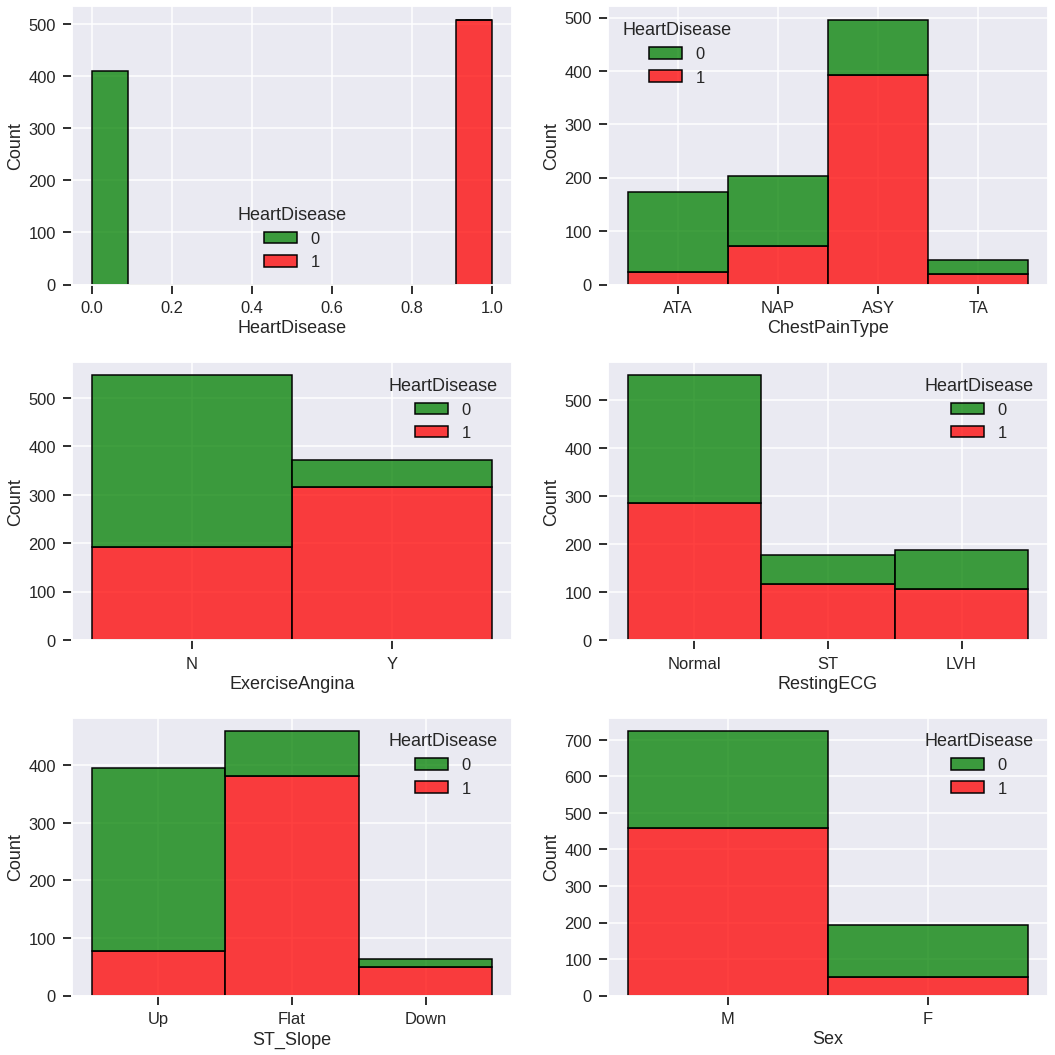

In [72]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))


plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="HeartDisease", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='Sex ', ylabel='Count')

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Sex", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='Sex ', ylabel='Count')

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ChestPainType", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='ChestPainType', ylabel='Count')

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ExerciseAngina", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='ExerciseAngina', ylabel='Count')

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingECG", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='RestingECG', ylabel='Count')

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ST_Slope", hue="HeartDisease",multiple="stack",palette=oe)
#ax.set(xlabel='ST_Slope', ylabel='Count')



<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

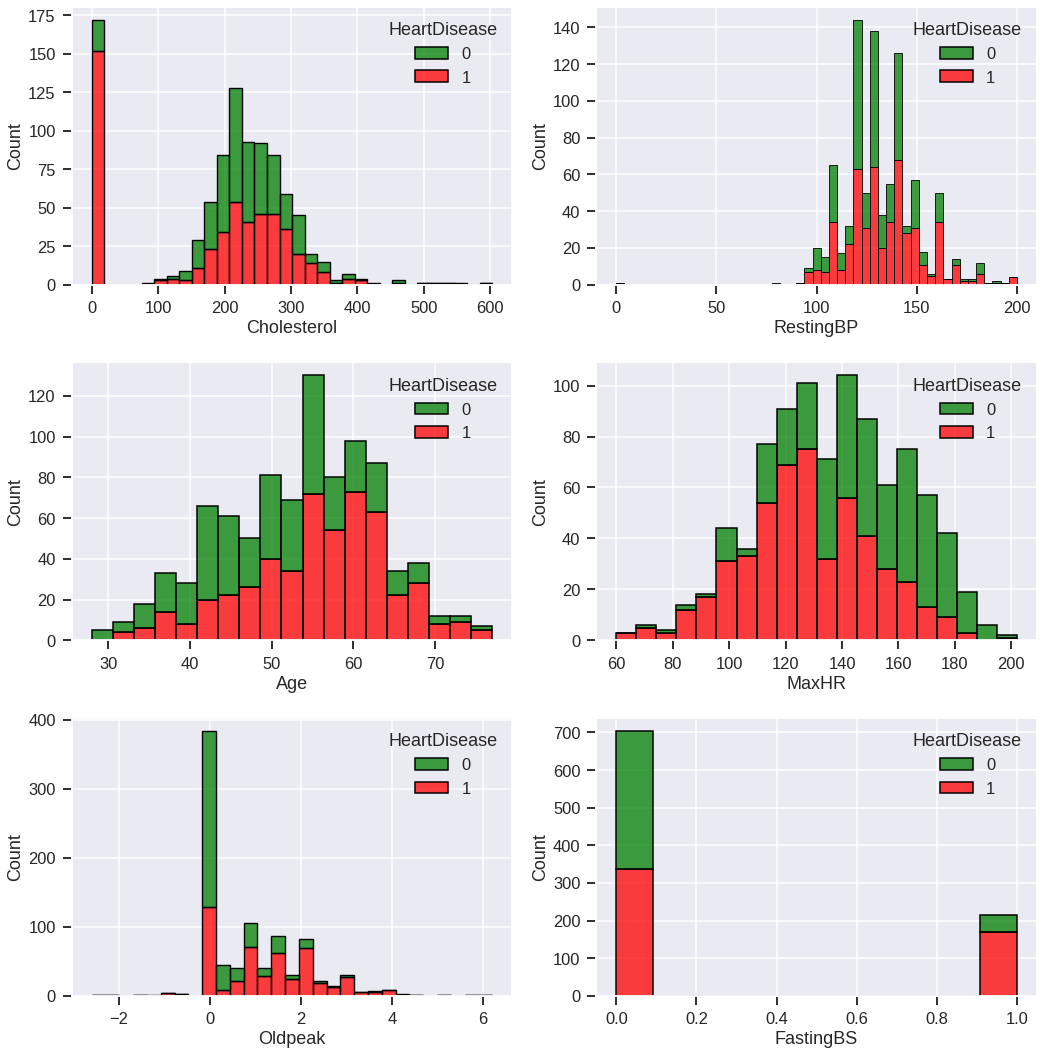

In [73]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingBP", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Age", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="MaxHR", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Oldpeak", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(3,2,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="FastingBS", hue="HeartDisease",multiple="stack",palette=oe)


The same graphs but in only one plot

In [ ]:
oe=['g','r']
fig = plt.figure(figsize=(15,15))

plt.subplot(4,3,1)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="HeartDisease", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,2)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Sex", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,3)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ChestPainType", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,4)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ExerciseAngina", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,5)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingECG", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,6)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="ST_Slope", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,7)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Cholesterol", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,8)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="RestingBP", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,9)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Age", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,10)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="MaxHR", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,11)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="Oldpeak", hue="HeartDisease",multiple="stack",palette=oe)

plt.subplot(4,3,12)
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x="FastingBS", hue="HeartDisease",multiple="stack",palette=oe)


<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

## From categorical to numeric

We must convert categorical data to numerical data

In [ ]:
'''
I want rappresent the heatmap here
Maybe we should do that after clean the dataset or show two differents heatmap: one whitout cholesterol 
and one only with colesterol, deleting rows with value 0
'''
onlyNumeric = pd.read_csv('dataset.csv')
onlyNumeric = onlyNumeric
del onlyNumeric["ChestPainType"]
del onlyNumeric["RestingECG"]
del onlyNumeric["ST_Slope"]
del onlyNumeric["ExerciseAngina"]
del onlyNumeric["Sex"]

#onlyNumeric.style.background_gradient(cmap ='viridis')\
        #.set_properties(**{'font-size': '20px'})
#df.columns
#df.drop(df.columns['ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope','Sex']), axis=1).set_index('Age')
corr = onlyNumeric.corr()
sns.heatmap(corr, annot = True)
#sns.heatmap(onlyNumeric, annot=True)

This is useful https://pbpython.com/categorical-encoding.html

In [ ]:
cleanup_nums = {"Sex":     {"M": 0, "F": 1},
                "ChestPainType": {"TA": 0, "ATA": 1, "NAP": 2, "ASY": 8},
                "RestingECG": {"Normal": 0, "ST": 1, "LVH": 2},
                "ExerciseAngina": {"N": 0, "Y": 1},
                "ST_Slope": {"Down": 0, "Flat": 1, "Up": 2}
               }

df = df.replace(cleanup_nums)
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths=.5, ax=ax)

## How can we manage inconsisten values?

This link contains some useful ways:
https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/

### Deleting the columns with missing data

In [ ]:

df_noC = pd.read_csv('dataset.csv')
df_noC = df_noC.replace(cleanup_nums)
df_noC = df_noC.drop(df_noC[df_noC.RestingBP == 0].index)
del df_noC["Cholesterol"]
#del df_noC["RestingBP"]
df_noC.info()


In [ ]:
df_noC.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

corr = df_noC.corr()
sns.heatmap(corr, annot = True, linewidths=.5, ax=ax)

### Deleting the rows with missing data

In [ ]:
#df_noR = pd.read_csv('dataset.csv')
df_noR = df.drop(df[df.Cholesterol == 0].index)
df_noR.info()


In [ ]:
df_noR.describe()

In [ ]:
df.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
corr = df_noR.corr()
sns.heatmap(corr, annot = True, linewidths=.5, ax=ax)

### Filling the Missing Values – Imputation

WE SHOULD FIND A WAY TO REPLACE 0 WITH THE MEAN VALUE ON CHOLESTEROL AND RESTINGBP

In [ ]:
'''
df_fill = df
df_fill.Cholesterol.replace(0, 244.635389)
df_fill["RestingBP"].replace(0, 133.022788)
df_fill.describe()
'''
cleanup_nums = {"Cholesterol":     {0: 244.635389},
                "RestingBP":      {0: 133.022788},
               }
df_mean = df.replace(cleanup_nums)

In [ ]:
df.describe()

In [ ]:
df_mean.describe()

### Imputation with an additional column

### Filling with a Regression Model

+++ MAYBE THIS IS TOO MUCH +++

## Normalize values

LINEAR REGRESSION

In [42]:
y = df['HeartDisease']
df.drop("HeartDisease",axis=1,inplace=True)
X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.3)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
print(y_test)

0.8115942028985508
767    0
616    0
264    1
146    0
429    1
      ..
338    1
776    1
109    0
405    1
344    1
Name: HeartDisease, Length: 276, dtype: int64


In [43]:
y = df_noC['HeartDisease']
df_noC.drop("HeartDisease",axis=1,inplace=True)
X_train, X_test,y_train,y_test = train_test_split(df_noC,y,test_size=0.3)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
print(y_test)

0.8079710144927537
675    0
436    1
167    0
139    1
201    0
      ..
807    0
413    1
397    1
234    0
89     0
Name: HeartDisease, Length: 276, dtype: int64


In [44]:
y = df_noR['HeartDisease']
df_noR.drop("HeartDisease",axis=1,inplace=True)
X_train, X_test,y_train,y_test = train_test_split(df_noR,y,test_size=0.3)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
print(y_test)

0.8482142857142857
553    1
730    0
78     0
31     0
835    1
      ..
885    0
100    1
808    1
774    1
139    1
Name: HeartDisease, Length: 224, dtype: int64
